In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


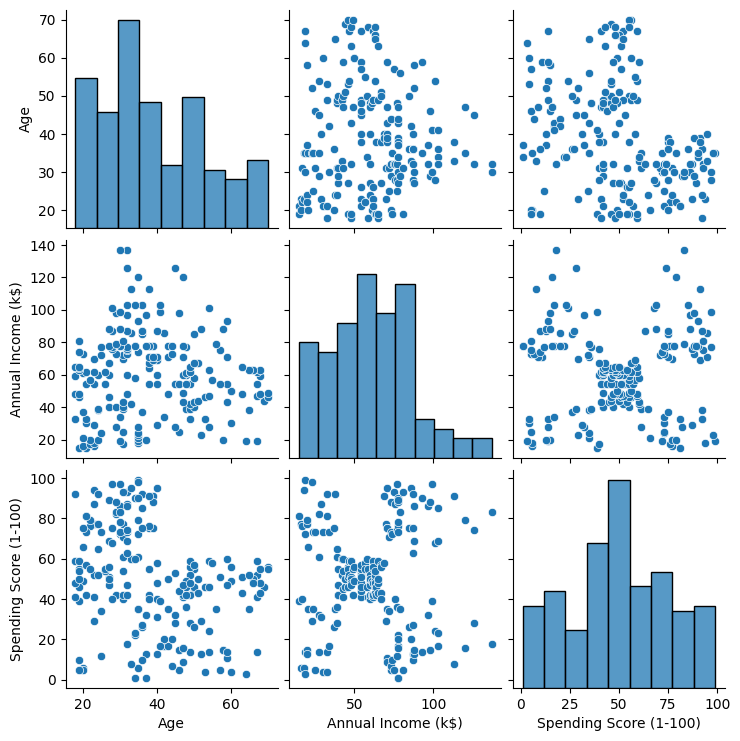

In [ ]:
sns.pairplot(df)

<ipython-input-8-5c9bfeb4bab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

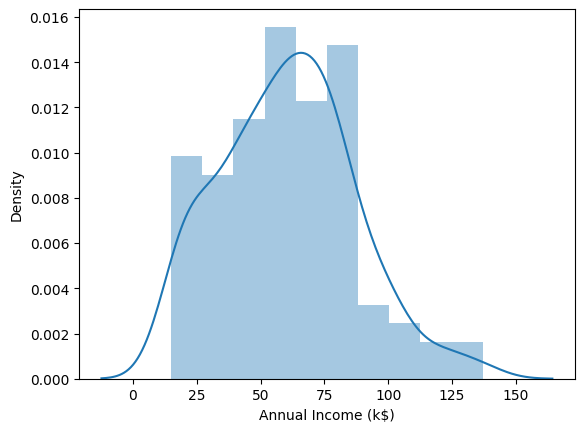

In [ ]:
sns.distplot(df['Annual Income (k$)'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


<Axes: >

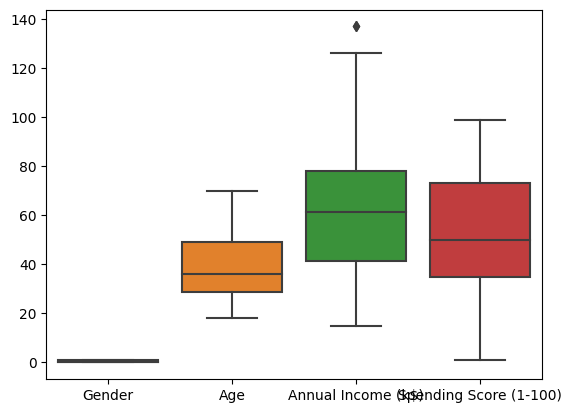

In [ ]:
sns.boxplot(df)

In [ ]:
x=df.drop(['Gender'],axis=1)
y=df['Gender']

In [ ]:
from sklearn.cluster import KMeans
score=[]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sse_scaled = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scaled)
    labels=km.predict(df_scaled)
    sse_scaled.append(km.inertia_)
    score.append(silhouette_score(X=df_scaled,labels=labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(score)

[0.2518152915788437, 0.26135746780821956, 0.3016237438985174, 0.31709067955763137, 0.32477308431890933, 0.3575533042931317, 0.38733199737864654, 0.4022780584999401, 0.42011198117622145]


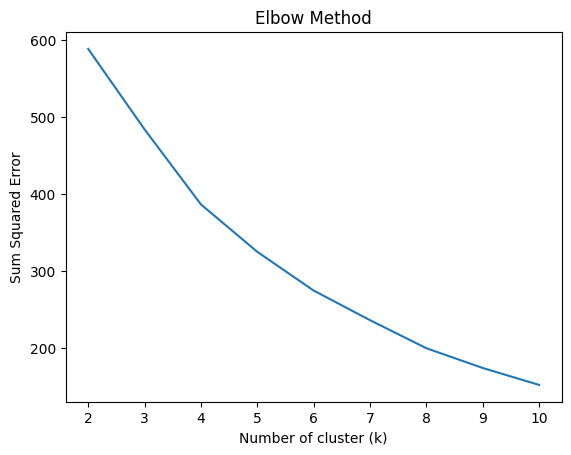

In [ ]:
g=sns.lineplot(x=range(2,11), y=sse_scaled)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [ ]:
model=KMeans(n_clusters=5,random_state=10)
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=10)

In [ ]:
print(model.inertia_)

327.3514986423794


In [ ]:
labels=model.predict(df_scaled)

Testing for random values

In [ ]:
test_1=df_scaled.iloc[0:1:1]
print(model.predict(test_1))

[0]


In [ ]:
test_2=df_scaled.iloc[8:9:1]
print(model.predict(test_2))

[3]


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

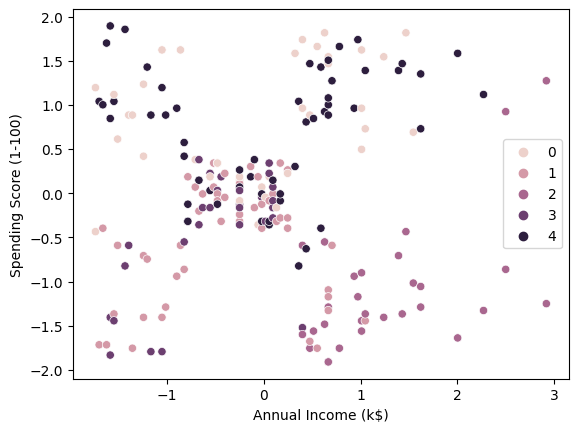

In [ ]:
sns.scatterplot(x=df_scaled['Annual Income (k$)'],y=df_scaled['Spending Score (1-100)'],hue=labels)